<a href="https://colab.research.google.com/github/JamesJardinella/PRML/blob/master/Jardinella_Assignment_1_ch01_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

<table class="tfo-notebook-buttons" align="left">
  
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/pantelis/PRML/blob/master/notebooks/ch01_Introduction.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# You need to adjust the directory names below for your own account
# e.g. you may elect to create ms-notebooks dir or not

# Execute this cell once

# 1. Download the repo and set it as the current directory
%cd /content/drive/My Drive/Colab Notebooks/ml-notebooks
!git clone https://github.com/pantelis/PRML
%cd /content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML

# 2. install the project/module
!python setup.py install



/content/drive/My Drive/Colab Notebooks/ml-notebooks
Cloning into 'PRML'...
remote: Enumerating objects: 3373, done.
remote: Total 3373 (delta 0), reused 0 (delta 0), pack-reused 3373
Receiving objects: 100% (3373/3373), 26.19 MiB | 11.52 MiB/s, done.
Resolving deltas: 100% (2071/2071), done.
Checking out files: 100% (423/423), done.
/content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML
running install
running bdist_egg
running egg_info
creating prml.egg-info
writing prml.egg-info/PKG-INFO
writing dependency_links to prml.egg-info/dependency_links.txt
writing requirements to prml.egg-info/requires.txt
writing top-level names to prml.egg-info/top_level.txt
writing manifest file 'prml.egg-info/SOURCES.txt'
writing manifest file 'prml.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/prml
copying prml/__init__.py -> build/lib/prml
creating build/lib/prml/bayesnet
copyi

In [ ]:
# 3. Add the project directory to the path
%cd /content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML
import os, sys
sys.path.append(os.getcwd())

/content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML


In [ ]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.preprocess import PolynomialFeature
from prml.linear import (
    LinearRegression,
    RidgeRegression,
    BayesianRegression
)

np.random.seed(1234)

## 1.1. Example: Polynomial Curve Fitting

The cell below defines $p_{data}(y|x)$ and generates the $\hat p_{data}(y|x)$

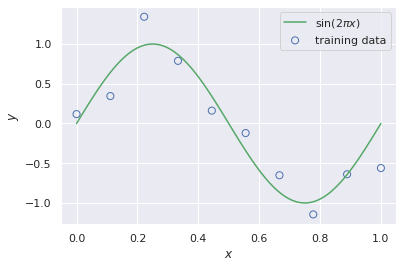

In [ ]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size) # p(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape) 
    return x, y

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

w's for M =  0 [-0.03592087]
w's for M =  1 [ 0.78301942 -1.63788059]
w's for M =  3 [ 1.13336032e-02  9.29216157e+00 -2.67894422e+01  1.70372865e+01]
w's for M =  9 [ 1.17858791e-01 -3.22314291e+01  5.52576193e+02 -2.72857332e+03
  4.76278430e+03  2.03128886e+03 -1.93595365e+04  2.83824707e+04
 -1.78561842e+04  4.24672692e+03]


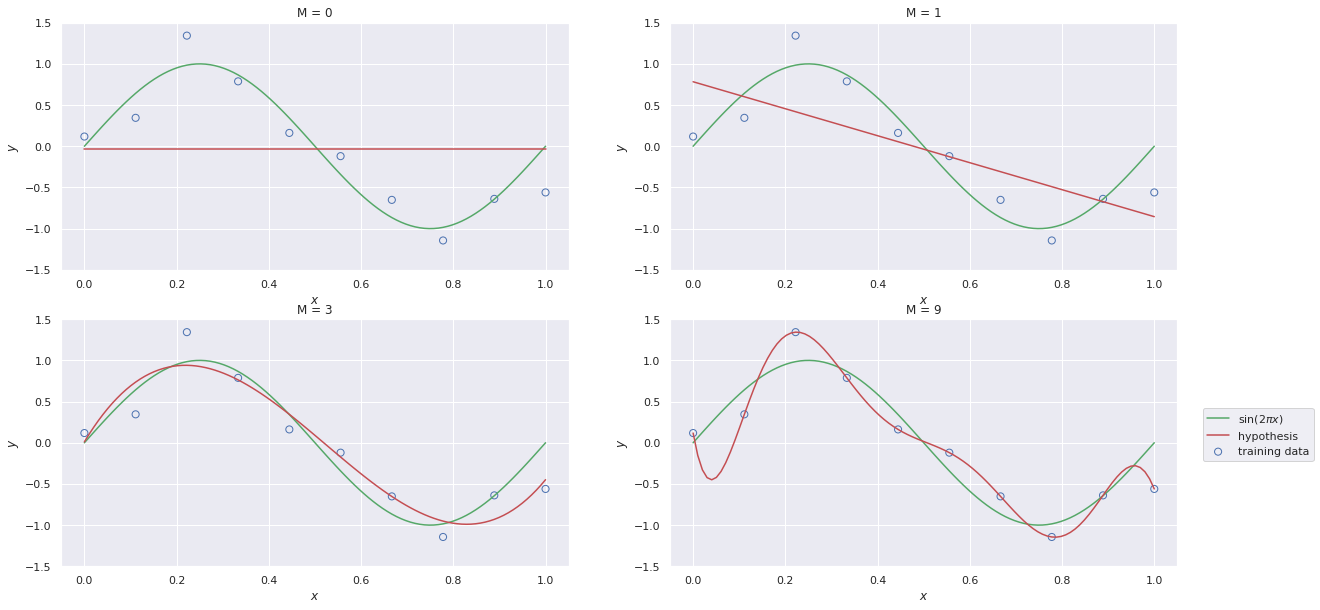

In [ ]:
plt.subplots(figsize=(20, 10))
for i, degree in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i + 1).set_title('M = {}'.format(degree)) 
    ####this makes 4+ subplots.  Added title to make it clear which one I am comparing.  Took me a while to figure out.
    
    feature = PolynomialFeature(degree) ##### degree is M???
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    print("w's for M = ", degree, model.w)
    y = model.predict(X_test)
    #print(degree,feature,y)

    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="hypothesis")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
    plt.xlabel('$x$')
    plt.ylabel('$y$') 
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

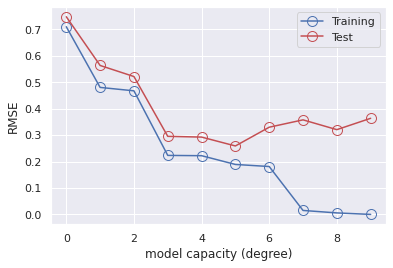

In [ ]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeature(i) ##### is this the degree?
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
   # print(model.coef_)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("model capacity (degree)")
plt.ylabel("RMSE")
plt.show()

**Add a new text cell and explain why the loss function is called Root Mean Squared Error (RMSE) and what the square root offers, if anything, to finding a better solution.**

RMSE--Root Mean Squared Error quantifies the mean distance of the residual (or error) between the expected valuea y and the values estimated by the model, $\hat y$.  Because $\hat y$ for each point may be either above or below the actual y value, the value for the residual may be positive or negative.  To avoid these values cancelling each other out when we find the total sum, we square each value and hence deal in positive values.  Finding the root of this value brings the units of the function back to the original units in the data (they are no longer squared).  The goal is to minimize this function within reason to avoid overfitting.  In reality you can define an error function to suit your purposes--e.g. the squaring of this tends to overstate outlier points so you may want to add something to penalize those points.  I have seen that folks often multiply the whole function by 1/2 to make it easier to take a derivative (the square root being the 1/2 power).  







**Model complexity (15 points)**

**Add a text cell after the corresponding figure explaining the behavior of the test error for M=9 vs M=3**. 

The RMSE of the test is ~0.3 at M= 3 wheras it increases to nearly 0.4 at M=9.  We see this result despite the near 0 RMSE we see with he training set at M=9.  This is because adding degrees beyond 3 will fit the training data perfectly but will suffer from overfitting.  You can see this if you look at the 4 subplots above where M=0 and M= 1 underfit as they are straight lines, whereas M=3 approximates the points nicely (but not exactly, leaving some room), and M=9 passes directly through all the training points exactly but is such a contorted function that it doesn't really track the general shape of the data--so it cannot predict well for data not in the training set which it has overfit.(actually it looks in the graph above like M=5 5, which is slightly different than in class) 





#### Regularization

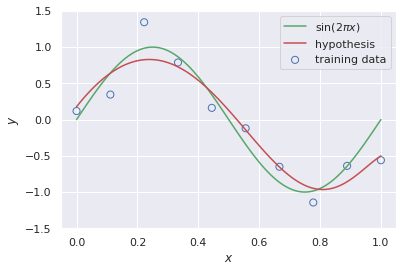

In [ ]:
feature = PolynomialFeature(9)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)
y = model.predict(X_test)

#y = model.predict(X_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="hypothesis")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.annotate("M=9", xy=(-0.15, 1))
plt.xlabel('$x$')
plt.ylabel('$y$') 
plt.show()

**Regularization (20 points)**

**Read the Linear Regression notes in the course site and add a text paragraph after the regularization cell explaining the output. Create a plot of the RMSE vs model complexity with regularization.**
(note plot in 2 cells below)

The MSE portion of the cost function tries to capture both the bias and the variance of the target variables and if the model complexity is too high it drives the bias down as the expense of variance.  As variance increases, so does the generaliztion error which is where the model is overfitted.  To combat this we add a regularization term reducesd the impact 

Regularization for linear models is usually accomplished via some sort of mechanism to constrain the model weights.  In this case we are using the Ridge regression model which adds a regularization term to the error calculation/cost function during training to fit the data and minimize the weights.  The additional term is $\alpha$\$\frac{1}{2}\\Sigma^n_{i=1}\theta^2_i$ where the hyperparameter controls the amount of regularization.  

This additional term can also be expressed as $\frac{1}{2}(\|w\|_2)^2 $ where $\|w\|_2$ represents the $l_2$ norm of the vector of weights [$\theta_1...\theta_n$].   

In the code we have $\alpha$ set to .001

We can see the impact that regularization has if we compare the fit of the model in the LinearRegression with a polynomial of 9--which is highly overfitted, to the fit of the results of the Ridge regression with the same polynomial--which is fitted similar to the Linear regression with a lower polynomial with better generalization.  We can also see this difference in the RMSE vs. Model Capacity graph below.

Note:  This is from Geron 133-134, I wanted to copy so I could remember and so I could play with Latex, which I find to be painful.  Note the notes uses $\lambda$ insteat of $\alpha$ in the discussion of the  𝑙2  norm



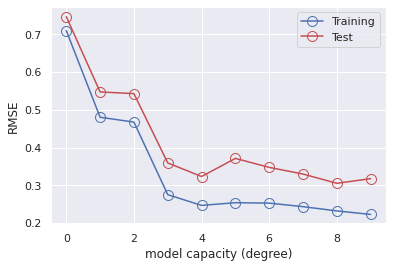

In [ ]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeature(i) ##### is this the degree?
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = RidgeRegression(alpha=1e-3)
    model.fit(X_train, y_train)
    y = model.predict(X_test)
   # print(model.coef_)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("model capacity (degree)")
plt.ylabel("RMSE")
plt.show()

### 1.2.6 Bayesian curve fitting

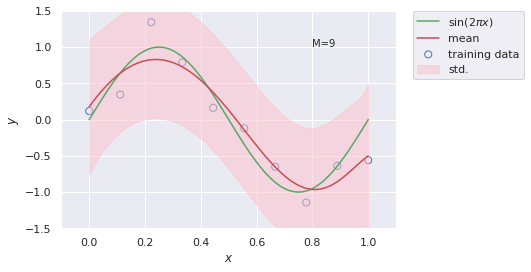

In [ ]:
model = BayesianRegression(alpha=2e-3, beta=2)
model.fit(X_train, y_train)

y, y_err = model.predict(X_test, return_std=True)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="mean")
plt.fill_between(x_test, y - y_err, y + y_err, color="pink", label="std.", alpha=0.5)
plt.xlim(-0.1, 1.1)
plt.ylim(-1.5, 1.5)
plt.annotate("M=9", xy=(0.8, 1))
plt.xlabel('$x$')
plt.ylabel('$y$') 
plt.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.)
plt.show()